In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def optimal_policy(index, opt_f, dp, actions):
    for i in range(2, 799):
        s1 = 0.5 * dp[index-1][i-1]  + 0.5 * dp[index-1][i+1]
        s2 = 0.5 * dp[index-1][i-2] + 0.5 * dp[index-1][i+2]
        dp[index][i] = opt_f([s1, s2])
        if dp[index][i] == s1:
            actions[index][i] = 0
        if dp[index][i] == s2:
            actions[index][i] = 2
        if dp[index][i] == s1 and dp[index][i] == s2:
            actions[index][i] = 1

def run_policy(index, opt_f, dp, actions):
    for i in range(2, 799):
        s1 = 0.5 * dp[index-1][i-1]  + 0.5 * dp[index-1][i+1]
        dp[index][i] = opt_f([s1])
        actions[index][i] = 0
        
def pass_policy(index, opt_f, dp, actions):
    for i in range(2, 799):
        s2 = 0.5 * dp[index-1][i-2] + 0.5 * dp[index-1][i+2]
        dp[index][i] = opt_f([s2])
        actions[index][i] = 2

In [3]:
def run_dp(p1, p2):
    dp = np.zeros((101, 801))
    actions = np.ones((101, 801))
    offset = 400 # this is an all tied game
    dp[0][offset]=0.5
    for i in range(offset+1, len(dp[0])):
        dp[0][i] = 1.0
    for i in range(101):
        dp[i][800] = 1.0
        dp[i][799] = 1.0
    for i in range(1, 101, 2):
        p1(i, max, dp, actions)
        p2(i+1, min, dp, actions)
    return dp, actions
    

In [4]:
def heatmap_plot(dp):
    plt.figure(figsize = (16,6))
    df = pd.DataFrame(dp)
    return sns.heatmap(df)

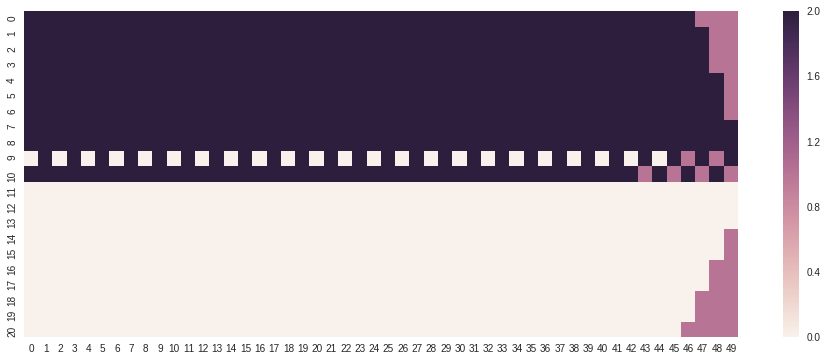

In [5]:
# Versus Run Going First
# You take your Left To Right
# Purple=Pass, White=Run, Pink=Doesn't Matter
# 10 is a tie
value, policy = run_dp(run_policy, optimal_policy)
policy = policy[2:101:2, 390:411]
policy = policy[::-1, ::-1]
policy = np.transpose(policy)
heatmap_plot(policy)
r_value1 = 1 - value[100][400]

Average Win Percentage Against Run 0.604036103074


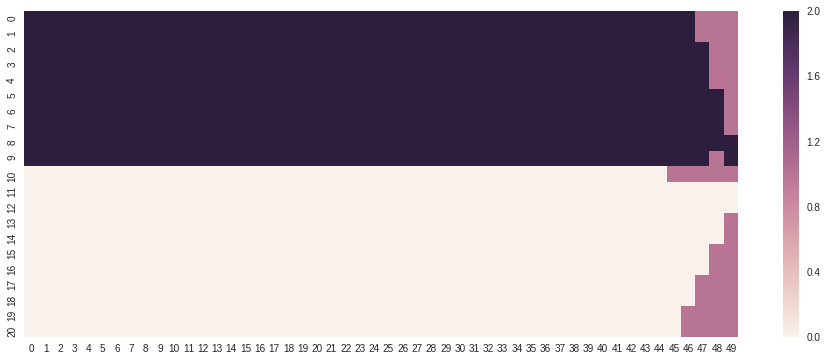

In [6]:
# Versus Run Going Second
# You take your Left To Right
# Y value is the plus/minus of game with a tie at 
# 10 i.e. 9 is you are down by one
# Purple=Pass, White=Run, Pink=Doesn't Matter
value, policy = run_dp(optimal_policy, run_policy)
policy = policy[1:101:2, 390:411]
policy = policy[::-1, :]
policy = np.transpose(policy)
heatmap_plot(policy)
r_value2 = value[100][400]
average_run_win = (r_value1 + r_value2) * 0.5
print("Average Win Percentage Against Run %s" % average_run_win)

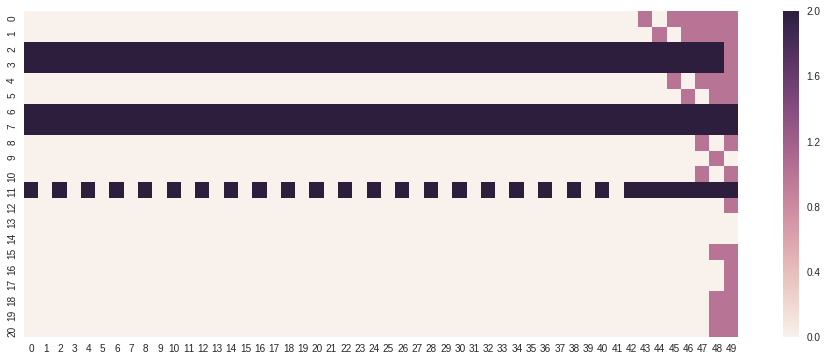

In [7]:
# Versus Pass Going First
# You take your Left To Right
# Purple=Pass, White=Run, Pink=Doesn't Matter
# 10 is a tie
value, policy = run_dp(pass_policy, optimal_policy)
policy = policy[2:101:2, 390:411]
policy = policy[::-1, ::-1]
policy = np.transpose(policy)
heatmap_plot(policy)
p_value1 = 1 - value[100][400]

Average Win Percentage Against Pass 0.561015995225


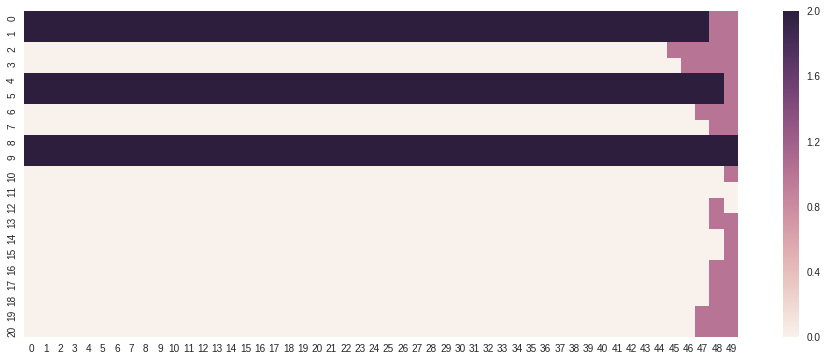

In [8]:
# Versus Pass Going Second
# You take your Left To Right
# Y value is the plus/minus of game with a tie at 
# 10 i.e. 9 is you are down by one
# Purple=Pass, White=Run, Pink=Doesn't Matter
value, policy = run_dp(optimal_policy, pass_policy)
policy = policy[1:101:2, 390:411]
policy = policy[::-1, :]
policy = np.transpose(policy)
heatmap_plot(policy)
p_value2 = value[100][400]
average_pass_win = (p_value1 + p_value2) * 0.5
print("Average Win Percentage Against Pass %s" % average_pass_win)

Win Percentage Against Optimal Going 1rst 0.489818590457


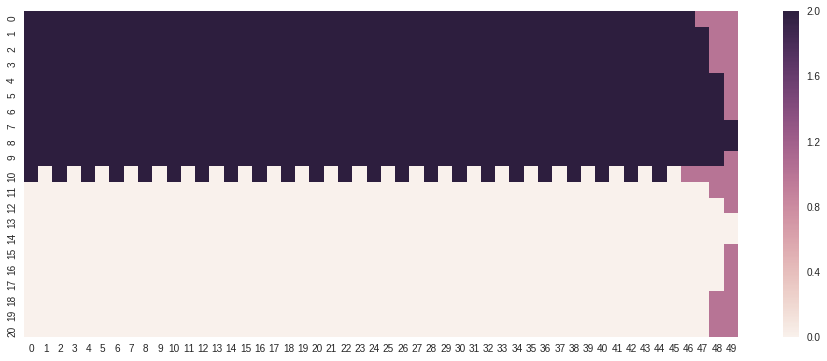

In [9]:
# Versus Optimal Going First
# You take your Left To Right
# Purple=Pass, White=Run, Pink=Doesn't Matter
# 10 is a tie
value, policy = run_dp(optimal_policy, optimal_policy)
policy = policy[2:101:2, 390:411]
policy = policy[::-1, ::-1]
policy = np.transpose(policy)
heatmap_plot(policy)
o_value1 = 1 - value[100][400]
print("Win Percentage Against Optimal Going 1rst %s" % o_value1)

Win Percentage Against Optimal Going 2nd 0.510181409543


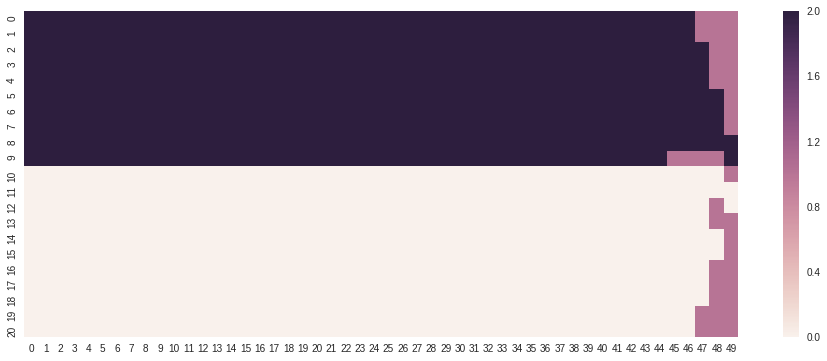

In [10]:
# Versus Optimal Going Second
# You take your Left To Right
# Purple=Pass, White=Run, Pink=Doesn't Matter
# 10 is a tie
value, policy = run_dp(optimal_policy, optimal_policy)
policy = policy[1:101:2, 390:411]
policy = policy[::-1, :]
policy = np.transpose(policy)
heatmap_plot(policy)
o_value2 = value[100][400]
print("Win Percentage Against Optimal Going 2nd %s" % o_value2)